In [24]:
pip install pyjstat

In [1]:
from pyjstat import pyjstat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
# Supress warnings 
import warnings 
warnings.filterwarnings('ignore')

https://pypi.org/project/pyjstat/

https://github.com/CSOIreland/PxStat/wiki/API-Cube-PxAPIv1

https://medium.com/mlearning-ai/a-guide-to-time-series-models-in-machine-learning-usage-pros-and-cons-ac590a75e8b3

https://www.influxdata.com/time-series-forecasting-methods/

https://github.com/PacktPublishing/Time-Series-Analysis-with-Python-3.x/blob/master/Section%205/5.3_ARIMA.ipynb

In [2]:
by_hour = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.PxAPIv1/en/46/RSARS/ROA19?query=%7B%22query%22:%5B%5D,%22response%22:%7B%22format%22:%22json-stat2%22,%22pivot%22:null,%22codes%22:false%7D%7D'
by_month = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.PxAPIv1/en/46/RSARS/ROA17?query=%7B%22query%22:%5B%5D,%22response%22:%7B%22format%22:%22json-stat2%22,%22pivot%22:null,%22codes%22:false%7D%7D'
by_day = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.PxAPIv1/en/46/RSARS/ROA18?query=%7B%22query%22:%5B%5D,%22response%22:%7B%22format%22:%22json-stat2%22,%22pivot%22:null,%22codes%22:false%7D%7D'
# dataset = pyjstat.Dataset.read(url)
# df = dataset.write('dataframe')
dataset = pyjstat.Dataset.read(by_month)

In [3]:
dfm = dataset.write('dataframe')
dfm.head()

,Statistic,Year,Month of Year,value
0,Fatal Collisions,2005,All months,360.0
1,Fatal Collisions,2005,January,31.0
2,Fatal Collisions,2005,February,34.0
3,Fatal Collisions,2005,March,23.0
4,Fatal Collisions,2005,April,20.0


In [4]:
dfm = dfm.drop(dfm[(dfm['Month of Year'] == 'All months')].index)
dfm = dfm.reset_index(drop=True)
dfm = dfm.dropna()

In [5]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1223 entries, 0 to 1223
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Statistic      1223 non-null   object 
 1   Year           1223 non-null   object 
 2   Month of Year  1223 non-null   object 
 3   value          1223 non-null   float64
dtypes: float64(1), object(3)
memory usage: 47.8+ KB


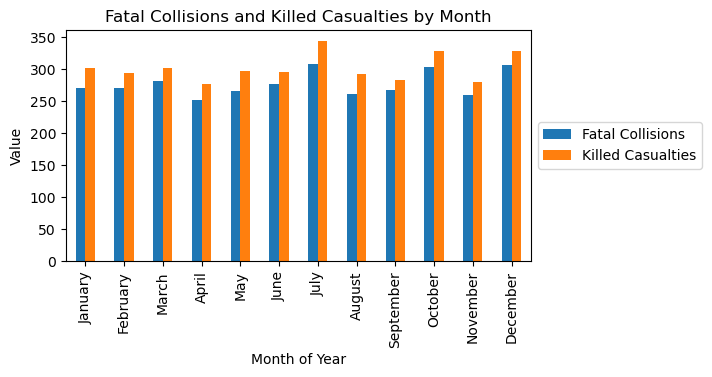

In [6]:
filtered_df = dfm[dfm['Statistic'].isin(['Fatal Collisions', 'Killed Casualties'])]

custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month of Year' column to categorical with custom order
filtered_df['Month of Year'] = pd.Categorical(filtered_df['Month of Year'], categories=custom_order, ordered=True)

# Group by 'Month of Year' and 'Statistic', summing up the values
grouped = filtered_df.groupby(['Month of Year', 'Statistic'])['value'].sum().unstack()


# Plot the grouped data
grouped.plot(kind='bar', stacked=False, figsize=(6, 3))

# Set labels and title
plt.xlabel('Month of Year')
plt.ylabel('Value')
plt.title('Fatal Collisions and Killed Casualties by Month')

# Show the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [16]:
grouped

Statistic,Fatal Collisions,Killed Casualties
Date,,
2005 April,20.0,23.0
2005 August,23.0,24.0
2005 December,37.0,40.0
2005 February,34.0,37.0
2005 January,31.0,33.0
...,...,...
2021 March,10.0,10.0
2021 May,7.0,7.0
2021 November,3.0,3.0


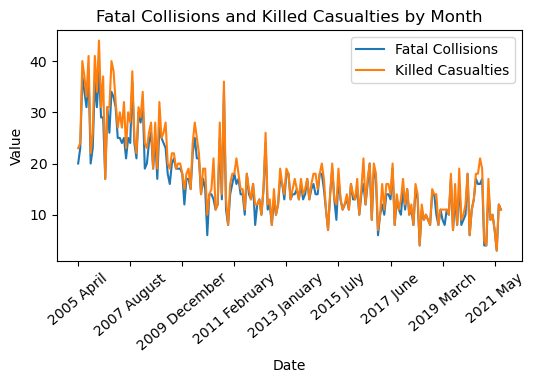

In [7]:
dfm['Date'] = dfm['Year'] + ' ' + dfm['Month of Year']
filtered_df = dfm[dfm['Statistic'].isin(['Fatal Collisions', 'Killed Casualties'])]
# Group by 'Month of Year' and 'Statistic', summing up the values
grouped = filtered_df.groupby(['Date', 'Statistic'])['value'].sum().unstack()


# Plot the grouped data
grouped.plot(kind='line', stacked=False, figsize=(6, 3))

plt.tick_params(axis='x',labelrotation=40)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Fatal Collisions and Killed Casualties by Month')

# Show the plot
plt.legend()
plt.show()

https://www.kaggle.com/code/freespirit08/time-series-for-beginners-with-arima/notebook

In [14]:
dfm['DATE'] = pd.to_datetime(dfm['Date'])

In [15]:
dfm

,Statistic,Year,Month of Year,value,Date,DATE
0,Fatal Collisions,2005,January,31.0,2005 January,2005-01-01
1,Fatal Collisions,2005,February,34.0,2005 February,2005-02-01
2,Fatal Collisions,2005,March,23.0,2005 March,2005-03-01
3,Fatal Collisions,2005,April,20.0,2005 April,2005-04-01
4,Fatal Collisions,2005,May,36.0,2005 May,2005-05-01
...,...,...,...,...,...,...
1219,All Killed and Injured Casualties,2021,August,610.0,2021 August,2021-08-01
1220,All Killed and Injured Casualties,2021,September,669.0,2021 September,2021-09-01
1221,All Killed and Injured Casualties,2021,October,655.0,2021 October,2021-10-01
1222,All Killed and Injured Casualties,2021,November,566.0,2021 November,2021-11-01


In [10]:
month_map = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}

In [11]:
dfm['Month'] = dfm['Month of Year'].map(month_map)
dfm['DATE'] = dfm['Year'] + '-' + dfm['Month']

In [12]:
dfm.head()

,Statistic,Year,Month of Year,value,Date,Month,DATE
0,Fatal Collisions,2005,January,31.0,2005 January,01,2005-01
1,Fatal Collisions,2005,February,34.0,2005 February,02,2005-02
2,Fatal Collisions,2005,March,23.0,2005 March,03,2005-03
3,Fatal Collisions,2005,April,20.0,2005 April,04,2005-04
4,Fatal Collisions,2005,May,36.0,2005 May,05,2005-05


In [13]:
filtered_df = dfm[dfm['Statistic'].isin(['Fatal Collisions', 'Killed Casualties'])]
grouped = filtered_df.groupby(['DATE', 'Statistic'])['value'].sum().unstack()

In [14]:
df = grouped.reset_index()
df.head().style.set_properties(subset=['DATE'], **{'background-color': 'dodgerblue'})

Statistic,DATE,Fatal Collisions,Killed Casualties
0,2005-01,31.000000,33.000000
1,2005-02,34.000000,37.000000
2,2005-03,23.000000,26.000000
3,2005-04,20.000000,23.000000
4,2005-05,36.000000,41.000000


In [15]:
df['DATE'] = pd.to_datetime(df['DATE'],infer_datetime_format=True) #convert from string to datetime
df.head()

Statistic,DATE,Fatal Collisions,Killed Casualties
0,2005-01-01,31.0,33.0
1,2005-02-01,34.0,37.0
2,2005-03-01,23.0,26.0
3,2005-04-01,20.0,23.0
4,2005-05-01,36.0,41.0


In [15]:
# Check time intervals
df['Time_Interval'] = df.DATE - df.DATE.shift(1)

df[['DATE', 'Time_Interval']].head()

Statistic,DATE,Time_Interval
0,2005-01-01,NaT
1,2005-02-01,31 days
2,2005-03-01,28 days
3,2005-04-01,31 days
4,2005-05-01,30 days


In [16]:
print(f"{df['Time_Interval'].value_counts()}")
df = df.drop('Time_Interval', axis=1)

Time_Interval
31 days    118
30 days     68
28 days     13
29 days      4
Name: count, dtype: int64


https://www.kaggle.com/code/iamleonie/intro-to-time-series-forecasting/notebook

## Stationarity

Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has

* constant mean and mean is not time-dependent
* constant variance and variance is not time-dependent
* constant covariance and covariance is not time-dependent

If a time series has a specific (stationary) behavior over a given time interval, then it can be assumed that the time series will behave the same at a later time.

Time series with trend and/or seasonality are not stationary. Trend indicates that the mean is not constant over time and seasonality indicates that the variance is not constant over time.

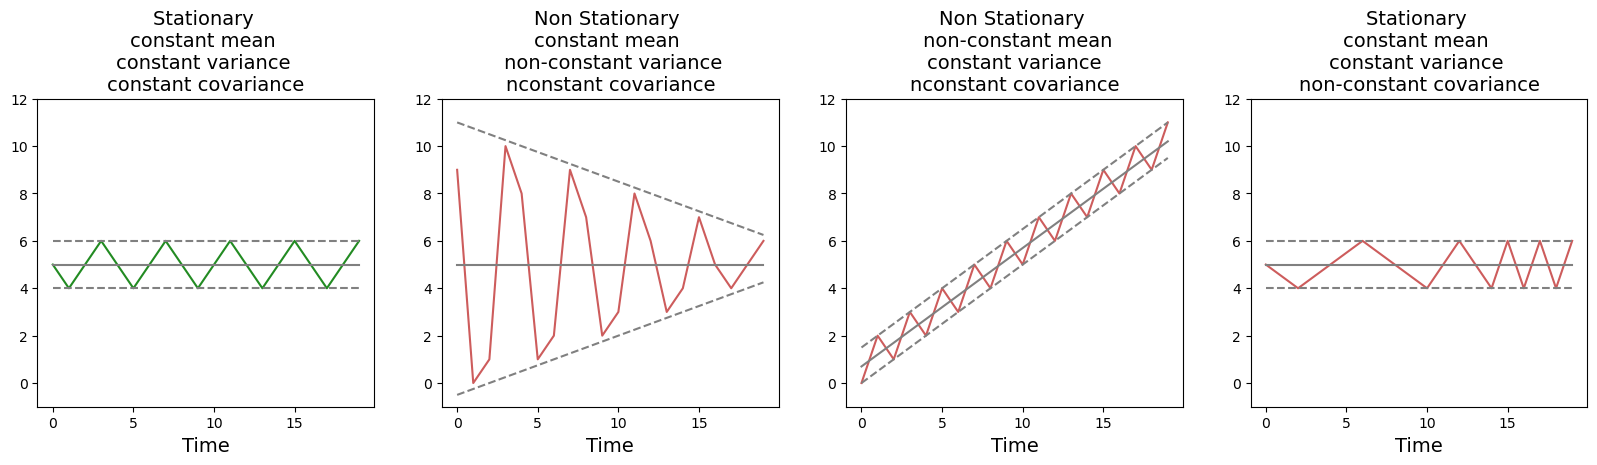

In [17]:
t = np.linspace(0, 19, 20)

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,4))
stationary = [5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6,]
sns.lineplot(x=t, y=stationary, ax=ax[0], color='forestgreen')
sns.lineplot(x=t, y=5, ax=ax[0], color='grey')
sns.lineplot(x=t, y=6, ax=ax[0], color='grey')
sns.lineplot(x=t, y=4, ax=ax[0], color='grey')
ax[0].lines[2].set_linestyle("--")
ax[0].lines[3].set_linestyle("--")
ax[0].set_title(f'Stationary \nconstant mean \nconstant variance \nconstant covariance', fontsize=14)

nonstationary1 = [ 9, 0, 1, 10, 8, 1, 2, 9, 7, 2, 3, 8, 6, 3, 4, 7, 5, 4, 5, 6]
sns.lineplot(x=t, y=nonstationary1, ax=ax[1], color='indianred' )
sns.lineplot(x=t, y=5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*0.25-0.5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*(-0.25)+11, ax=ax[1], color='grey')
ax[1].lines[2].set_linestyle("--")
ax[1].lines[3].set_linestyle("--")
ax[1].set_title(f'Non Stationary \nconstant mean \n non-constant variance\nnconstant covariance', fontsize=14)

nonstationary2 = [0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9, 8, 10, 9, 11,]
sns.lineplot(x=t, y=nonstationary2, ax=ax[2], color='indianred' )
sns.lineplot(x=t, y=t*0.5+0.7, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5+1.5, ax=ax[2], color='grey')
ax[2].lines[2].set_linestyle("--")
ax[2].lines[3].set_linestyle("--")
ax[2].set_title(f'Non Stationary \n non-constant mean\nconstant variance\nnconstant covariance', fontsize=14)

nonstationary3 = [5, 4.5, 4, 4.5, 5, 5.5, 6, 5.5, 5, 4.5, 4, 5, 6, 5, 4, 6, 4, 6, 4, 6,]
sns.lineplot(x=t, y=nonstationary3, ax=ax[3], color='indianred')
sns.lineplot(x=t, y=5, ax=ax[3], color='grey')
sns.lineplot(x=t, y=6, ax=ax[3], color='grey')
sns.lineplot(x=t, y=4, ax=ax[3], color='grey')
ax[3].lines[2].set_linestyle("--")
ax[3].lines[3].set_linestyle("--")
ax[3].set_title(f'Stationary \nconstant mean \nconstant variance \nnon-constant covariance', fontsize=14)

for i in range(4):
    ax[i].set_ylim([-1, 12])
    ax[i].set_xlabel('Time', fontsize=14)

##### The check for stationarity can be done via three different approaches:

1. <b>visually </b>: plot time series and check for trends or seasonality
2. <b>basic statistics</b>: split time series and compare the mean and variance of each partition + Normal distribution
3. <b>statistical test</b>: Augmented Dickey Fuller test

Let's do the visual check first. We can see that both features have non-constant mean and non-constant variance. Therefore, none of these seem to be stationary.

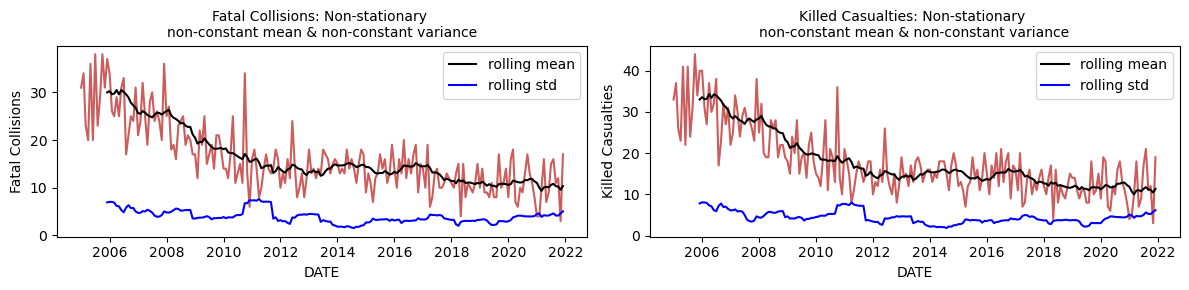

In [19]:
rolling_window = 12 #yearly
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

sns.lineplot(x=df.DATE, y=df['Fatal Collisions'], ax=ax[0], color='indianred')
sns.lineplot(x=df.DATE, y=df['Fatal Collisions'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df.DATE, y=df['Fatal Collisions'].rolling(rolling_window).std(), ax=ax[0], color='blue', label='rolling std')
ax[0].set_title('Fatal Collisions: Non-stationary \nnon-constant mean & non-constant variance', fontsize=10)
ax[0].set_ylabel(ylabel='Fatal Collisions', fontsize=10)

sns.lineplot(x=df.DATE, y=df['Killed Casualties'], ax=ax[1], color='indianred')
sns.lineplot(x=df.DATE, y=df['Killed Casualties'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df.DATE, y=df['Killed Casualties'].rolling(rolling_window).std(), ax=ax[1], color='blue', label='rolling std')
ax[1].set_title('Killed Casualties: Non-stationary \nnon-constant mean & non-constant variance', fontsize=10)
ax[1].set_ylabel(ylabel='Killed Casualties', fontsize=10)

plt.tight_layout()
plt.show()

Next, we will check the underlying statistics. For this we will split the time series into two sections and check the mean and the variance. 

In [ ]:
num_partitions = 2
partition_length = int(len(df) / num_partitions)

partition1_mean = df.head(partition_length).mean()
partition1_var = df.head(partition_length).var()
partition2_mean = df.tail(partition_length).mean()
partition2_var = df.tail(partition_length).var()

Let's evaluate the histograms. Since we are looking at the mean and variance, we are expecting that the data conforms to a Gaussian distribution (bell shaped distribution) in case of stationarity.

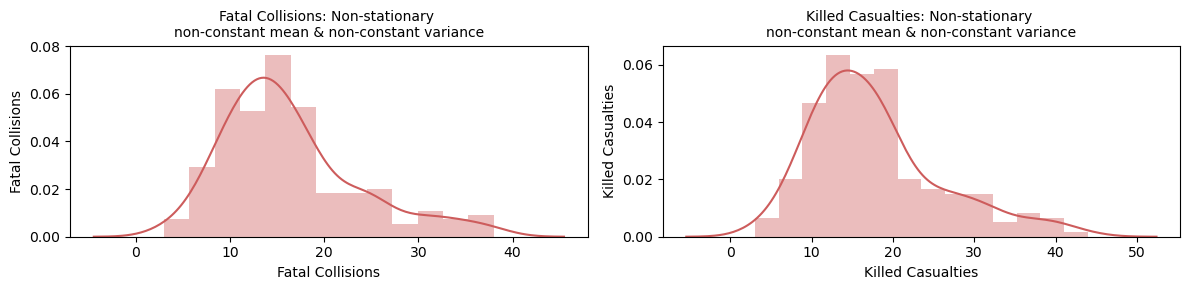

In [22]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

sns.distplot(df['Fatal Collisions'], ax=ax[0], color='indianred')
ax[0].set_title('Fatal Collisions: Non-stationary \nnon-constant mean & non-constant variance', fontsize=10)
ax[0].set_ylabel(ylabel='Fatal Collisions', fontsize=10)

sns.distplot(df['Killed Casualties'], ax=ax[1], color='indianred')
ax[1].set_title('Killed Casualties: Non-stationary \nnon-constant mean & non-constant variance', fontsize=10)
ax[1].set_ylabel(ylabel='Killed Casualties', fontsize=10)

plt.tight_layout()
plt.show()

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

* Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).

* Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

If the null hypothesis can be rejected, we can conclude that the time series is stationary.

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

* **p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is **non-stationary**.
* **p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is **stationary**.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

* **ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is **non-stationary**. 
* **ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is **stationary**. 

In [24]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Fatal Collisions'].values)
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']

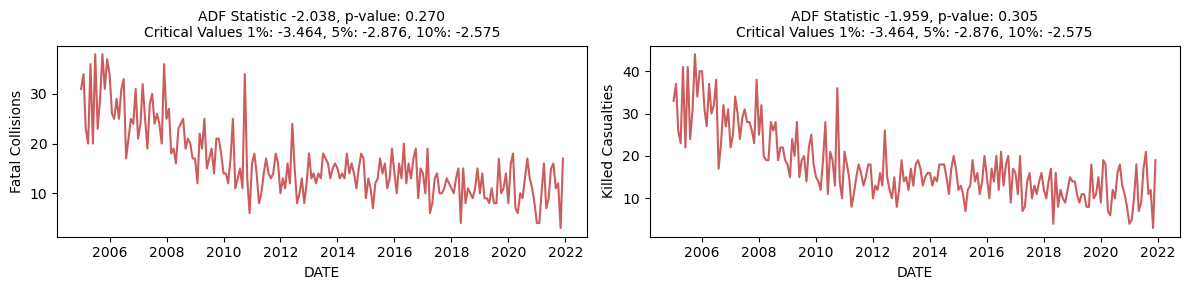

In [62]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=df.DATE, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=10)
    ax.set_ylabel(ylabel=title, fontsize=10)

visualize_adfuller_results(df['Fatal Collisions'].values, 'Fatal Collisions', ax[0])
visualize_adfuller_results(df['Killed Casualties'].values, 'Killed Casualties', ax[1])


plt.tight_layout()
plt.show()

If the data is not stationary but we want to use a model that requires with characteristic, the data has to be transformed. However, if the data is not stationary to begin with, we should rethink the choice of model.

The two most common methods to achieve stationarity are:

* Transformation: e.g. log or square root to stabilize non-constant variance
* Differencing: subtracts the current value from the previous

In [63]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['Fatal Collisions Log'] = np.log(abs(df['Fatal Collisions']))
df['Killed Casualties Log'] = np.log(abs(df['Killed Casualties']))

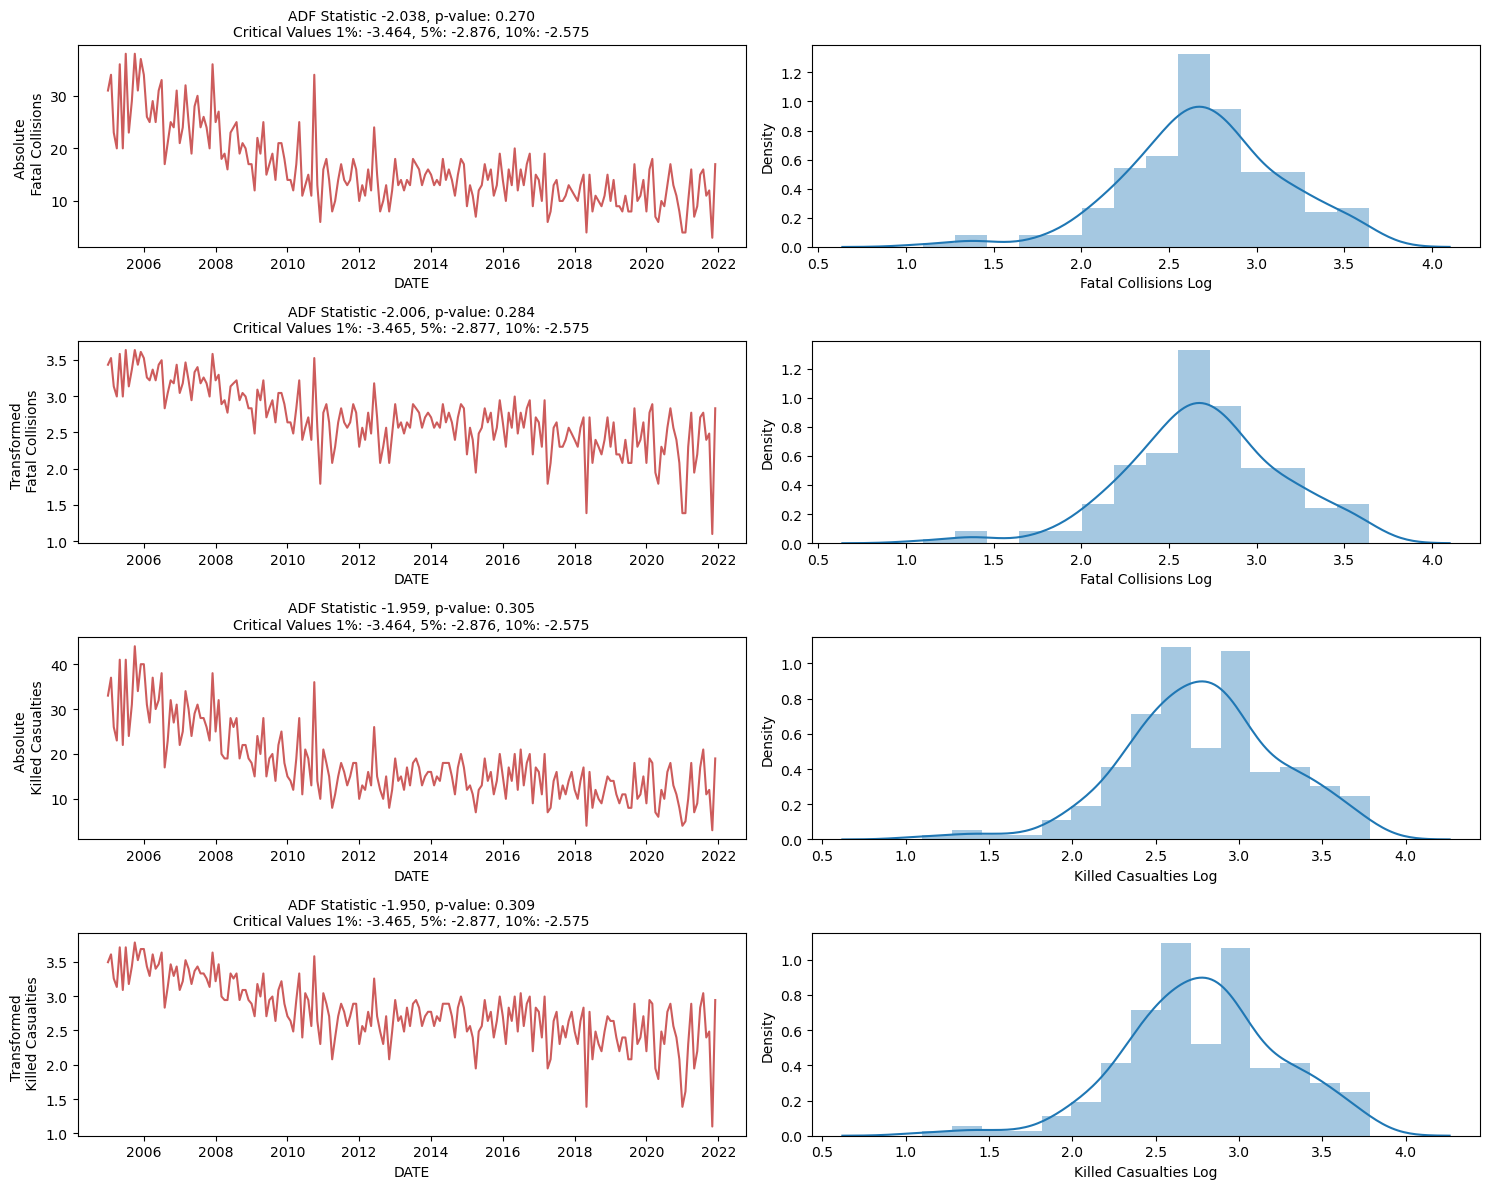

In [64]:
f, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
visualize_adfuller_results(abs(df['Fatal Collisions']), 'Absolute \n Fatal Collisions', ax[0, 0])
sns.distplot(df['Fatal Collisions Log'], ax=ax[0, 1])

visualize_adfuller_results(df['Fatal Collisions Log'], 'Transformed \n Fatal Collisions', ax[1, 0])
sns.distplot(df['Fatal Collisions Log'], ax=ax[1, 1])

visualize_adfuller_results(abs(df['Killed Casualties']), 'Absolute \n Killed Casualties', ax[2, 0])
sns.distplot(df['Killed Casualties Log'], ax=ax[2, 1])

visualize_adfuller_results(df['Killed Casualties Log'], 'Transformed \n Killed Casualties', ax[3, 0])
sns.distplot(df['Killed Casualties Log'], ax=ax[3, 1])

plt.tight_layout()
plt.show()

Differencing can be done in different orders:

* First order differencing: linear trends with  zi=yi−yi−1
 
* Second-order differencing: quadratic trends with  zi=(yi−yi−1)−(yi−1−yi−2)
 
* and so on...

In [65]:
# First Order Differencing
ts_diff = np.diff(df['Fatal Collisions'])
df['Fatal Collisions_diff_1'] = np.append([0], ts_diff)
ts_diff = np.diff(df['Killed Casualties'])
df['Killed Casualties_diff_1'] = np.append([0], ts_diff)

# Second Order Differencing
ts_diff = np.diff(df['Fatal Collisions_diff_1'])
df['Fatal Collisions_diff_2'] = np.append([0], ts_diff)
ts_diff = np.diff(df['Killed Casualties_diff_1'])
df['Killed Casualties_diff_2'] = np.append([0], ts_diff)

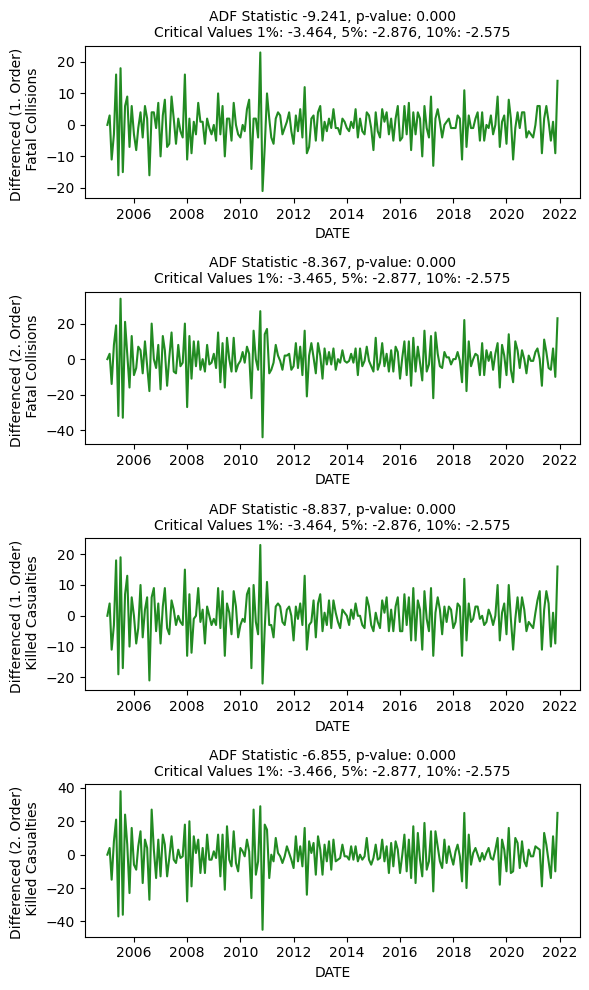

In [75]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(6, 10))

visualize_adfuller_results(df['Fatal Collisions_diff_1'], 'Differenced (1. Order) \n Fatal Collisions', ax[0])
visualize_adfuller_results(df['Fatal Collisions_diff_2'], 'Differenced (2. Order) \n Fatal Collisions', ax[1])
visualize_adfuller_results(df['Killed Casualties_diff_1'], 'Differenced (1. Order) \n Killed Casualties', ax[2])
visualize_adfuller_results(df['Killed Casualties_diff_2'], 'Differenced (2. Order) \n Killed Casualties', ax[3])
plt.tight_layout()
plt.show()

The differencing can be reverted if the the first value before differencing is known. In this case, we can accumulate all values with the function .cumsum() and add the first value of the original time series.

In [76]:
df['Fatal Collisions'].equals(df['Fatal Collisions_diff_1'].cumsum() + df['Fatal Collisions'].iloc[0])

True

### Feature Engineering
#### Time Features

In [77]:
df['year'] = pd.DatetimeIndex(df['DATE']).year
df['month'] = pd.DatetimeIndex(df['DATE']).month
df['quarter'] = pd.DatetimeIndex(df['DATE']).quarter
df['season'] = df.month%12 // 3 + 1

df[['DATE', 'year', 'month', 'quarter', 'season']].head()

Statistic,DATE,year,month,quarter,season
0,2005-01-01,2005,1,1,1
1,2005-02-01,2005,2,1,1
2,2005-03-01,2005,3,1,2
3,2005-04-01,2005,4,2,2
4,2005-05-01,2005,5,2,2


### Encoding Cyclical Features
The new time features are cyclical. For example,the feature month cycles between 1 and 12 for every year. While the difference between each month increments by 1 during the year, between two years the month feature jumps from 12 (December) to 1 (January). This results in a -11 difference, which can confuse a lot of models.

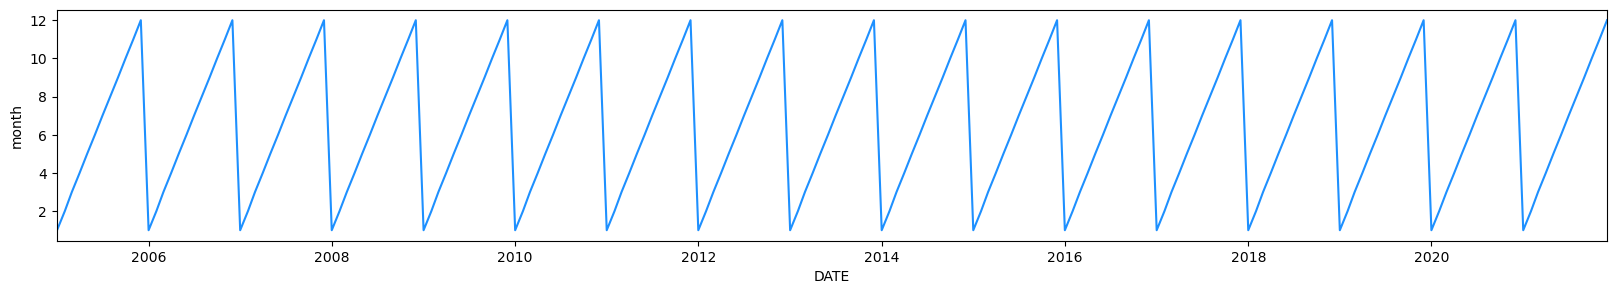

In [107]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df.DATE, y=df.month, color='dodgerblue')
ax.set_xlim([date(2005, 1, 1), date(2021, 12, 1)])
plt.show()

Ideally, we want the underlying data to represent the same difference between two consecutive months, even between December and January. A common remedy for this issue is to encode cyclical features into two dimensions with sine and cosine transformation.

In [79]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df.month/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df.month/month_in_year)

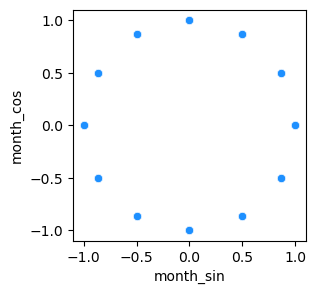

In [80]:
quarters_in_year = 4
df['quarter_sin'] = np.sin(2*np.pi*df.quarter/quarters_in_year)
df['quarter_cos'] = np.cos(2*np.pi*df.quarter/quarters_in_year)

seasons_in_year = 4
df['season_sin'] = np.sin(2*np.pi*df.season/seasons_in_year)
df['season_cos'] = np.cos(2*np.pi*df.season/seasons_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

### Decomposition
The characteristics of a time series are

* Trend and Level
* Seasonality
* Random / Noise

We can use the function seasonal_decompose() from the statsmodels library.

* Additive: y(t)=Level+Trend+Seasonality+Noise
 
* Multiplicative:  y(t)=Level∗Trend∗Seasonality∗Noise

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_cols =  ['Fatal Collisions', 'Killed Casualties']

for col in decompose_cols:
    decomp = seasonal_decompose(df[col], period =12, model='additive', extrapolate_trend='freq')
    df[f"{col}_trend"] = decomp.trend
    df[f"{col}_seasonal"] = decomp.seasonal

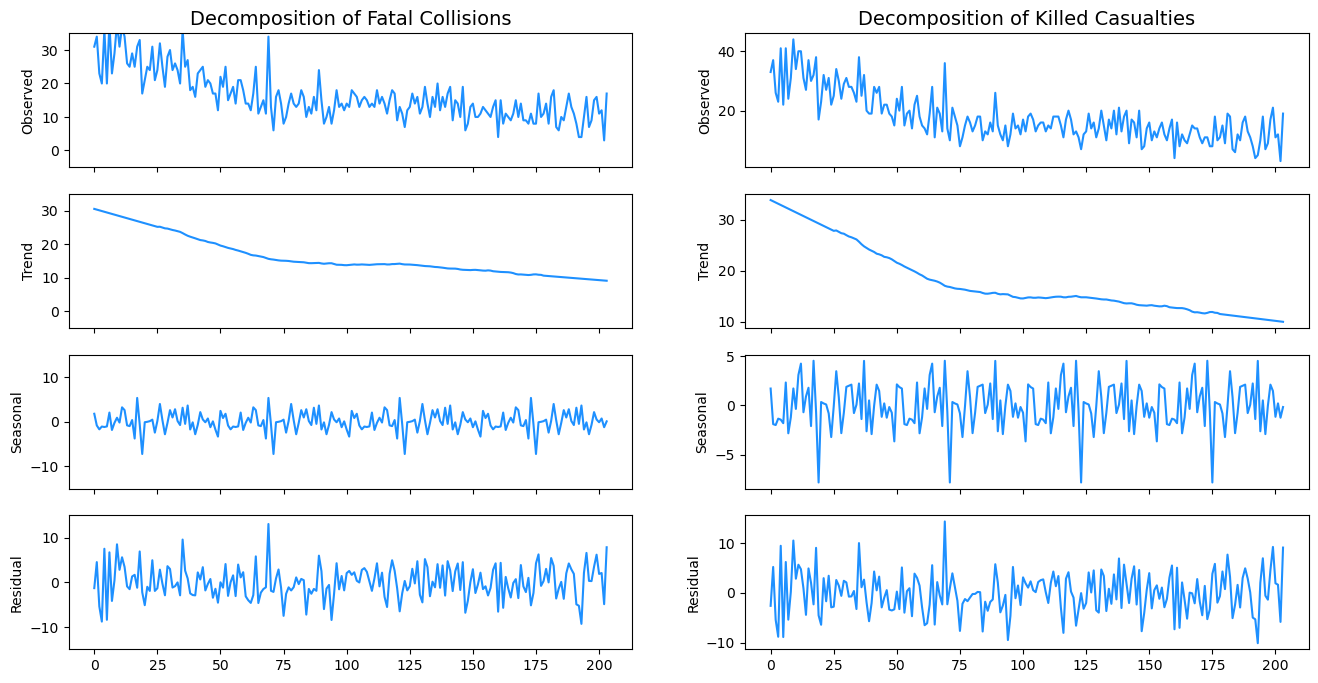

In [82]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))
res = seasonal_decompose(df['Fatal Collisions'], period=52, model='additive', extrapolate_trend='freq')

ax[0,0].set_title('Decomposition of Fatal Collisions', fontsize=14)
res.observed.plot(ax=ax[0,0], legend=False, color='dodgerblue')
ax[0,0].set_ylabel('Observed', fontsize=10)
ax[0,0].set_ylim([-5, 35])

res.trend.plot(ax=ax[1,0], legend=False, color='dodgerblue')
ax[1,0].set_ylabel('Trend', fontsize=10)
ax[1,0].set_ylim([-5, 35])

res.seasonal.plot(ax=ax[2,0], legend=False, color='dodgerblue')
ax[2,0].set_ylabel('Seasonal', fontsize=10)
ax[2,0].set_ylim([-15, 15])

res.resid.plot(ax=ax[3,0], legend=False, color='dodgerblue')
ax[3,0].set_ylabel('Residual', fontsize=10)
ax[3,0].set_ylim([-15, 15])

ax[0,1].set_title('Decomposition of Killed Casualties', fontsize=14)
res = seasonal_decompose(df['Killed Casualties'], period=52, model='additive', extrapolate_trend='freq')

res.observed.plot(ax=ax[0, 1], legend=False, color='dodgerblue')
ax[0, 1].set_ylabel('Observed', fontsize=10)

res.trend.plot(ax=ax[1, 1], legend=False, color='dodgerblue')
ax[1, 1].set_ylabel('Trend', fontsize=10)

res.seasonal.plot(ax=ax[2, 1], legend=False, color='dodgerblue')
ax[2, 1].set_ylabel('Seasonal', fontsize=10)

res.resid.plot(ax=ax[3, 1], legend=False, color='dodgerblue')
ax[3, 1].set_ylabel('Residual', fontsize=10)

plt.show()

In [83]:
df[['Fatal Collisions', 'Fatal Collisions_trend', 'Fatal Collisions_seasonal', 
          'Killed Casualties', 'Killed Casualties_trend', 'Killed Casualties_seasonal'
   ]].head()\
.style.set_properties(subset=['Fatal Collisions_trend', 'Fatal Collisions_seasonal', 
                              'Killed Casualties_trend', 'Killed Casualties_seasonal'
                             ], **{'background-color': 'dodgerblue'})

Statistic,Fatal Collisions,Fatal Collisions_trend,Fatal Collisions_seasonal,Killed Casualties,Killed Casualties_trend,Killed Casualties_seasonal
0,31.000000,32.146950,-0.970905,33.000000,35.225087,-0.733364
1,34.000000,31.903798,-0.883073,37.000000,35.036131,-1.067838
2,23.000000,31.660645,-0.219260,26.000000,34.847174,-0.588585
3,20.000000,31.417492,-1.861820,23.000000,34.658217,-1.861784
4,36.000000,31.174340,-0.891634,41.000000,34.469260,-0.519786


### Exploratory Data Analysis
Let's begin by plotting the seasonal components of each feature and comparing the minima and maxima. By doing this, we can already gain some insights:

The depth to groundwater reaches its maximum around May/June and its minimum around November/December
The temperature reaches its maxmium around August and its minimum around January
The volume reaches its maximum around June and its minimum around August/September. It takes longer to reach its maximum than to reach its minimum.
The hydrometry reaches its maximum around March and its minimum around September

The volume and hydrometry reach their minimum roughly around the same time

The volume and hydrometry reach their minimum when the temperature reaches its maximum
Temperature lags begind depth to groundwater by around 2 to 3 months

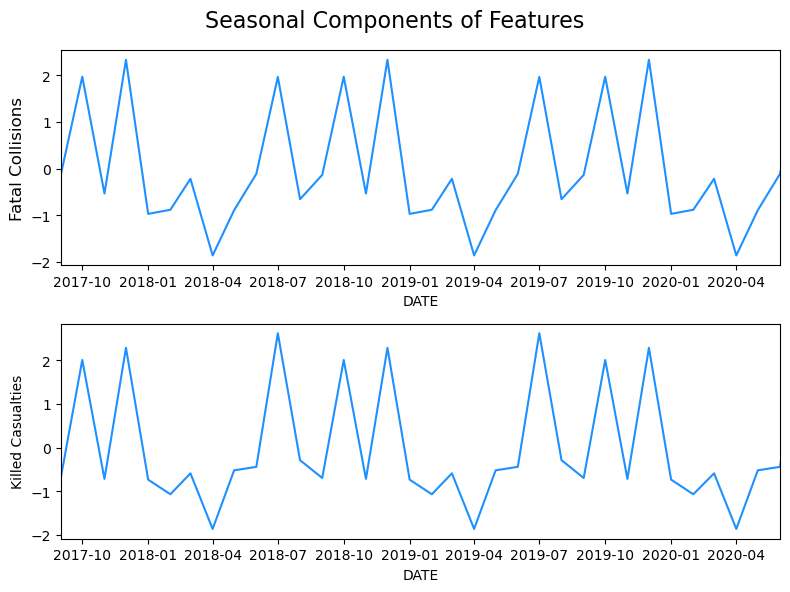

In [91]:
from datetime import datetime, date
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
f.suptitle('Seasonal Components of Features', fontsize=16)
sns.lineplot(x=df.DATE, y=df['Fatal Collisions_seasonal'], ax=ax[0], color='dodgerblue')
ax[0].set_ylabel(ylabel='Fatal Collisions', fontsize=12)

sns.lineplot(x=df.DATE, y=df['Killed Casualties_seasonal'], ax=ax[1], color='dodgerblue')
ax[1].set_ylabel(ylabel='Killed Casualties', fontsize=10)

for i in range(2):
    ax[i].set_xlim([date(2017, 9, 1), date(2020, 6, 1)])
plt.tight_layout()
plt.show()

We can see that the correlation to the target variables increases if we use the time shifted features in comparison to the original features.



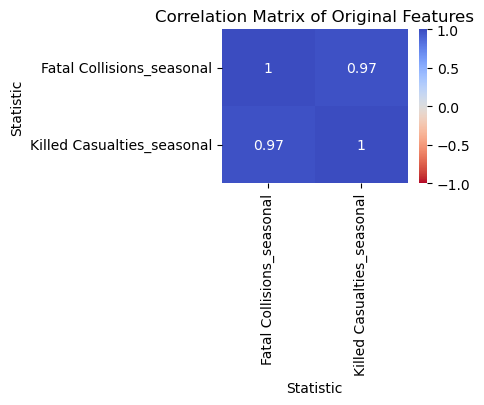

In [97]:
f, ax = plt.subplots(figsize=(3, 2))

original_cols = ['Fatal Collisions_seasonal','Killed Casualties_seasonal']

corrmat = df[original_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)
ax.set_title('Correlation Matrix of Original Features', fontsize=12)

# shifted_cols = [ 'Depth_to_Groundwater_seasonal', 
#                 'Temperature_seasonal_shift_r_2M',
#                 'Drainage_Volume_seasonal_shift_1M', 'River_Hydrometry_seasonal_shift_3M']
# corrmat = df[shifted_cols].corr()

# sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
# ax[1].set_title('Correlation Matrix of Shifted Features', fontsize=16)


plt.tight_layout()
plt.show()

### Autocorrelation Analysis

This EDA step is especially important when using ARIMA. The autocorrelation analysis helps to identify the AR and MA parameters for the ARIMA model.

* Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

* Autocorrelation Function (ACF): Correlation between time series with a lagged version of itself. The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1. -> MA parameter is q significant lags
Partial Autocorrelation Function (PACF): Additional correlation explained by each successive lagged term -> AR parameter is p significant lags

Autocorrelation helps in detecting seasonality.

As we can infer from the graph above, the autocorrelation continues to decrease as the lag increases, confirming that there is no linear association between observations separated by larger lags.

For the AR process, we expect that the ACF plot will gradually decrease and simultaneously the PACF should have a sharp drop after p significant lags. To define a MA process, we expect the opposite from the ACF and PACF plots, meaning that: the ACF should show a sharp drop after a certain q number of lags while PACF should show a geometric or gradual decreasing trend.

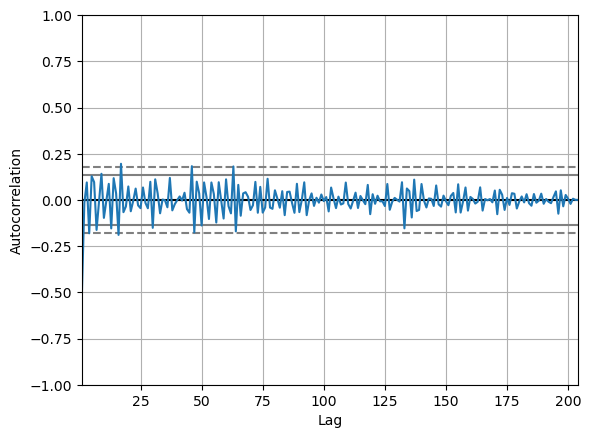

In [98]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Killed Casualties_diff_1'])
plt.show()

We can see some sinusoidal shape in both ACF and PACF functions. This suggests that both AR and MA processes are present.

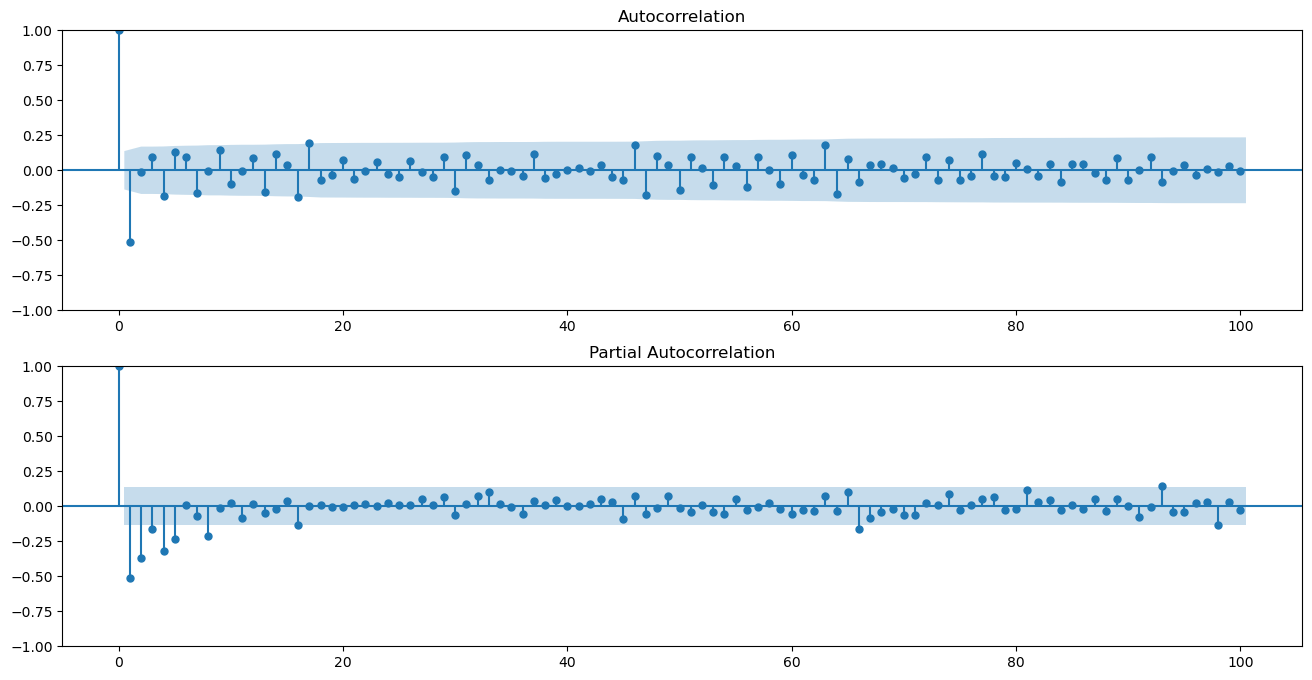

In [99]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['Killed Casualties_diff_1'],lags=100, ax=ax[0])
plot_pacf(df['Killed Casualties_diff_1'],lags=100, ax=ax[1])
plt.show()


#### Cross Validation
For cross validation, you can use the Time Series Split library. In Time Series Forecasting: Building Intuition, I go into depth about different types of time series problems and their cross validation methods.

In [100]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df.DATE
y = df['Killed Casualties']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

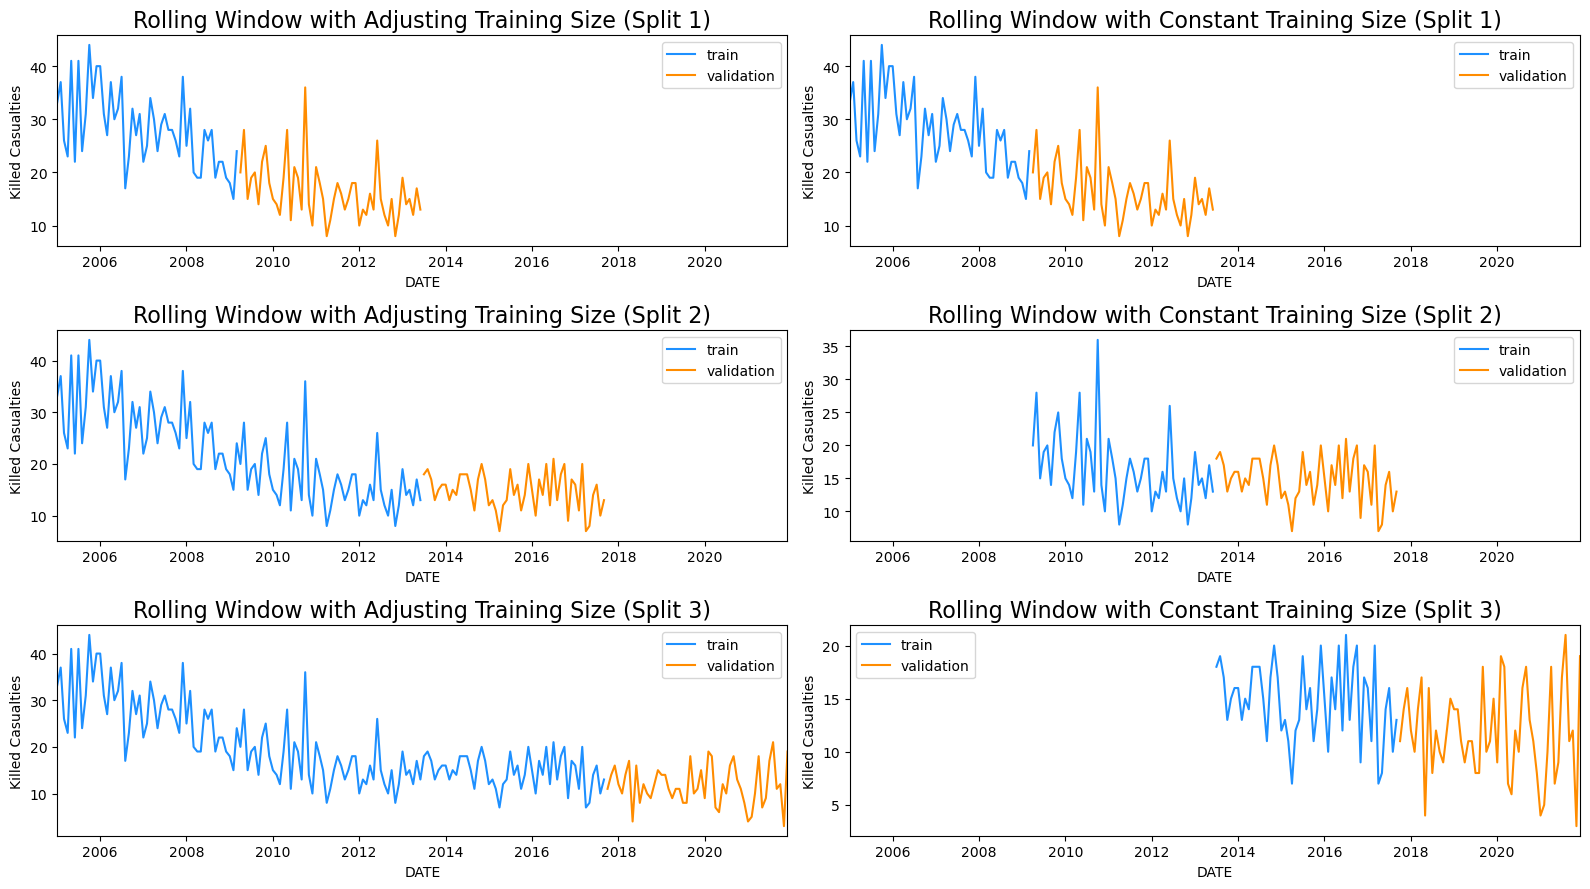

In [102]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 y= y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 ax=ax[i,1], color='dodgerblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2005, 1, 1), date(2021, 12, 1)])
    ax[i, 1].set_xlim([date(2005, 1, 1), date(2021, 12, 1)])
plt.tight_layout()
plt.show()

Models
Time series can be either univariate or multivariate:

Univariate time series only has a single time-dependent variable.
Multivariate time series have a multiple time-dependent variable.
Our example originally is a multivariate time series because its has multiple features that are all time-dependent. However, by only looking at the target variable Depth to Groundwater we can convert it to a univariate time series.

We will focus on a quarterly forecast. We will use the Q2 2020 as test data and the remaining data will be split by quarter for cross validation.

We will evaluate the Mean Absolute Error (MAE) and the Root Mean Square Error (RMSE) of the models. For metrics are better the smaller they are.

Models for Univariate Time Series
Stochastic Models
Naive Approach
Moving Average
Exponential Smoothing
ARIMA
Prophet
Deep Learning
LSTM
GRU

In [119]:
df

Statistic,DATE,Fatal Collisions,Killed Casualties,Fatal Collisions Log,Fatal Collisions_diff_1,Fatal Collisions_diff_2,year,month,quarter,season,...,season_sin,season_cos,Fatal Collisions_trend,Fatal Collisions_seasonal,Killed Casualties_trend,Killed Casualties_seasonal,Killed Casualties Log,Killed Casualties_diff_1,Killed Casualties_diff_2,quarter_idx
0,2005-01-01,31.0,33.0,3.433987,0.0,0.0,2005,1,1,1,...,1.000000e+00,6.123234e-17,32.146950,-0.970905,35.225087,-0.733364,3.496508,0.0,0.0,1
1,2005-02-01,34.0,37.0,3.526361,3.0,3.0,2005,2,1,1,...,1.000000e+00,6.123234e-17,31.903798,-0.883073,35.036131,-1.067838,3.610918,4.0,4.0,1
2,2005-03-01,23.0,26.0,3.135494,-11.0,-14.0,2005,3,1,2,...,1.224647e-16,-1.000000e+00,31.660645,-0.219260,34.847174,-0.588585,3.258097,-11.0,-15.0,1
3,2005-04-01,20.0,23.0,2.995732,-3.0,8.0,2005,4,2,2,...,1.224647e-16,-1.000000e+00,31.417492,-1.861820,34.658217,-1.861784,3.135494,-3.0,8.0,2
4,2005-05-01,36.0,41.0,3.583519,16.0,19.0,2005,5,2,2,...,1.224647e-16,-1.000000e+00,31.174340,-0.891634,34.469260,-0.519786,3.713572,18.0,21.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2021-08-01,16.0,21.0,2.772589,1.0,-5.0,2021,8,3,3,...,-1.000000e+00,-1.836970e-16,9.841298,-0.656357,10.639423,-0.287149,3.044522,4.0,-4.0,67
200,2021-09-01,11.0,11.0,2.397895,-5.0,-6.0,2021,9,3,4,...,-2.449294e-16,1.000000e+00,9.776467,-0.135387,10.573718,-0.695049,2.397895,-10.0,-14.0,67
201,2021-10-01,12.0,12.0,2.484907,1.0,6.0,2021,10,4,4,...,-2.449294e-16,1.000000e+00,9.711636,1.968917,10.508013,2.007346,2.484907,1.0,11.0,68
202,2021-11-01,3.0,3.0,1.098612,-9.0,-10.0,2021,11,4,4,...,-2.449294e-16,1.000000e+00,9.646805,-0.534622,10.442308,-0.716730,1.098612,-9.0,-10.0,68


In [126]:
df['quarter_idx'] = (df.quarter != df.quarter.shift(1)).cumsum()
col = 'DATE', 'Fatal Collisions'

target = 'Killed Casualties'
#features = 'DATE'
features = [feature for feature in df.col if feature != target]

N_SPLITS = 46

X = df[df.quarter_idx < N_SPLITS][features]
y = df[df.quarter_idx < N_SPLITS][target]

X_test = df[df.quarter_idx == N_SPLITS][features].reset_index(drop=True)
y_test = df[df.quarter_idx == N_SPLITS][target].reset_index(drop=True)

AttributeError: 'DataFrame' object has no attribute 'col'

In [125]:
df.columns

Index(['DATE', 'Fatal Collisions', 'Killed Casualties', 'Fatal Collisions Log',
       'Fatal Collisions_diff_1', 'Fatal Collisions_diff_2', 'year', 'month',
       'quarter', 'season', 'month_sin', 'month_cos', 'quarter_sin',
       'quarter_cos', 'season_sin', 'season_cos', 'Fatal Collisions_trend',
       'Fatal Collisions_seasonal', 'Killed Casualties_trend',
       'Killed Casualties_seasonal', 'Killed Casualties Log',
       'Killed Casualties_diff_1', 'Killed Casualties_diff_2', 'quarter_idx'],
      dtype='object', name='Statistic')

AttributeError: 'Series' object has no attribute 'DATE'

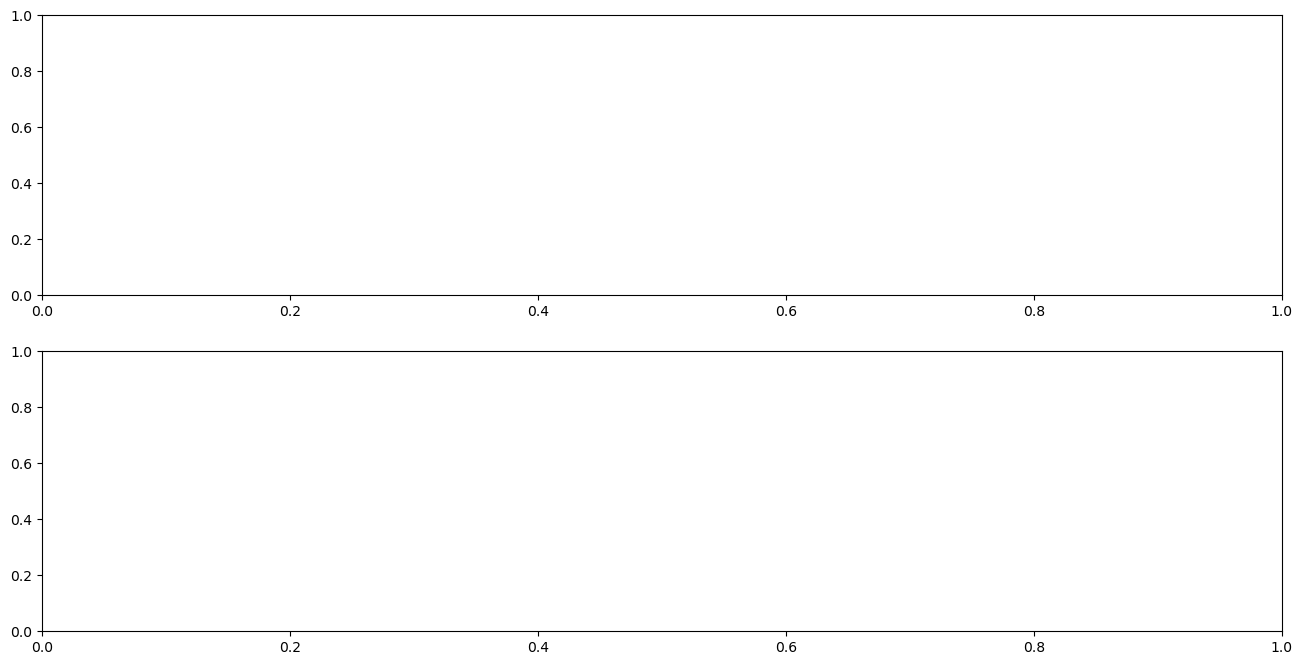

In [118]:
folds = np.linspace(0, N_SPLITS-3, num=N_SPLITS-2)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.lineplot(x=X.DATE, y=y, ax=ax[0], color='dodgerblue', label='train')
sns.lineplot(x=X_test.DATE, y=y_test, ax=ax[0], color='darkorange', label='test')

sns.lineplot(x=df.DATE, y=df.quarter_idx, ax=ax[1], color='dodgerblue')
ax[0].set_xlim([date(2005, 1, 1), date(2021, 12, 1)])
ax[1].set_xlim([date(2005, 1, 1), date(2021, 12, 1)])
ax[1].set_ylim([0, N_SPLITS+1])
#ax[0].set_ylim([-28, -23])

plt.show()

In [115]:
def plot_approach_evaluation(y_pred, score_mae, score_rsme, approach_name):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    f.suptitle(approach_name, fontsize=16)
    sns.lineplot(x=X.DATE, y=y, ax=ax[0], color='dodgerblue', label='Training', linewidth=2)
    sns.lineplot(x=X_test.DATE, y=y_test, ax=ax[0], color='gold', label='Ground Truth', linewidth=2) #navajowhite
    sns.lineplot(x=X_test.DATE, y=y_pred, ax=ax[0], color='darkorange', label='Predicted', linewidth=2)
    ax[0].set_xlim([date(2018, 6, 30), date(2020, 6, 30)])
    ax[0].set_ylim([-27, -23])
    ax[0].set_title(f'Prediction \n MAE: {mean_absolute_error(y_test, y_pred):.2f}, RSME: {math.sqrt(mean_squared_error(y_valid, y_valid_pred)):.2f}', fontsize=14)
    ax[0].set_xlabel(xlabel='Date', fontsize=14)
    ax[0].set_ylabel(ylabel='Depth to Groundwater P25', fontsize=14)

    sns.lineplot(x=folds, y=score_mae,  color='gold', label='MAE', ax=ax[1])#marker='o',
    sns.lineplot(x=folds, y=score_rsme, color='indianred', label='RSME', ax=ax[1])
    ax[1].set_title('Loss', fontsize=14)
    ax[1].set_xlabel(xlabel='Fold', fontsize=14)
    ax[1].set_ylabel(ylabel='Loss', fontsize=14)
    ax[1].set_ylim([0, 4])   
    plt.show()

https://www.kaggle.com/code/iamleonie/intro-to-time-series-forecasting

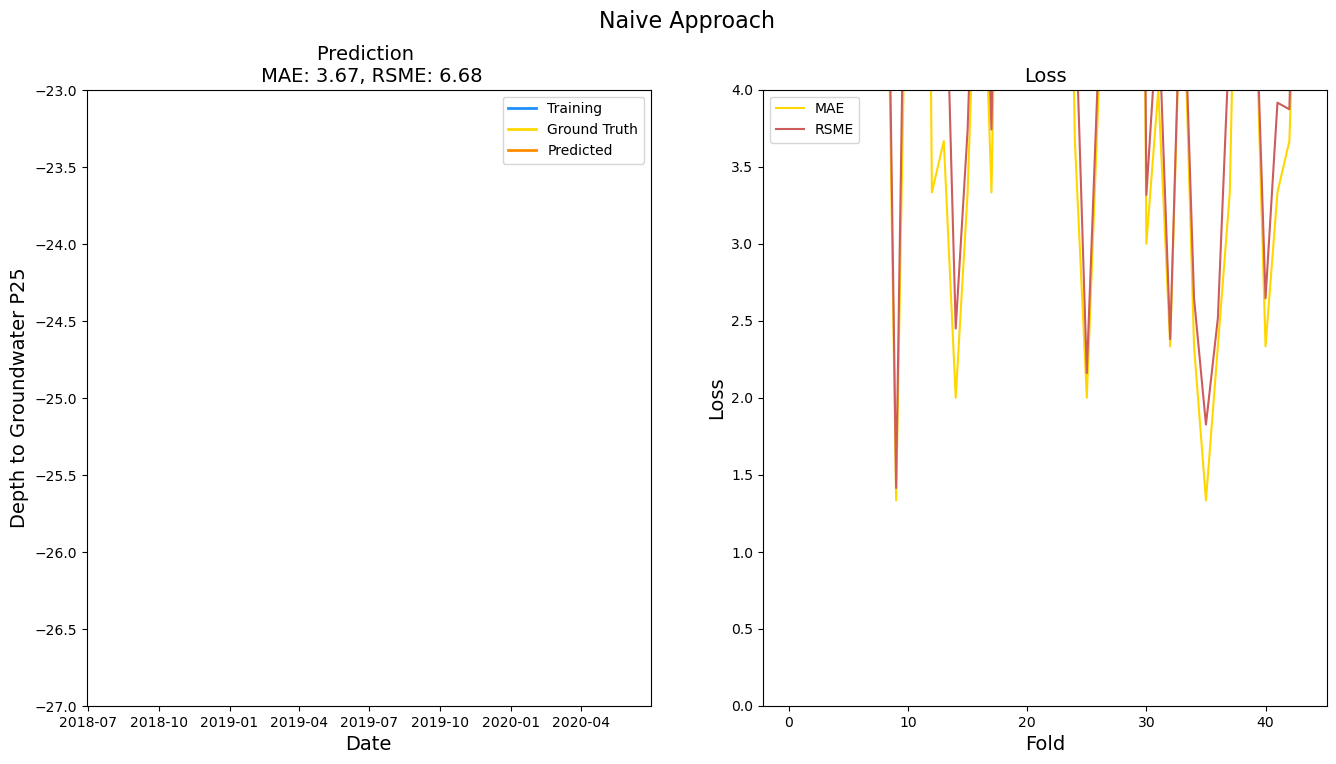

In [116]:
score_mae = []
score_rsme = []
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach
    y_valid_pred = y_valid_pred * y_train.iloc[-1]
    
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.ones(len(X_test))) * y.iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Naive Approach')